In [0]:
# Import necessary libraries
from sklearn.datasets import load_iris
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, PCA
from pyspark.ml.feature import StandardScaler

In [0]:
# Load Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['label'] = iris.target


In [0]:
# Create a Spark DataFrame
spark = SparkSession.builder.appName("DimensionalityReduction").getOrCreate()
df = spark.createDataFrame(data)


In [0]:
# Assemble features into a single vector
assembler = VectorAssembler(inputCols=iris.feature_names, outputCol="features")
assembled_df = assembler.transform(df)


In [0]:
# Standardize the features
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)
scaler_model = scaler.fit(assembled_df)
scaled_df = scaler_model.transform(assembled_df)


In [0]:
# Apply PCA
pca = PCA(k=2, inputCol="scaledFeatures", outputCol="pcaFeatures")
pca_model = pca.fit(scaled_df)
pca_df = pca_model.transform(scaled_df)

In [0]:
# Show the resulting PCA features
pca_df.select("pcaFeatures").show(truncate=False)

+-----------------------------------------+
|pcaFeatures                              |
+-----------------------------------------+
|[2.257141175648118,-0.47842383212489914] |
|[2.07401301519962,0.6718826870273611]    |
|[2.356335111806177,0.34076642462457063]  |
|[2.291706785869694,0.595399862681545]    |
|[2.381862704416937,-0.6446756594005371]  |
|[2.068700608467692,-1.484205297342159]   |
|[2.4358684489631375,-0.04748511806193312]|
|[2.225391888780552,-0.22240300191944]    |
|[2.3268453293413147,1.111603699537918]   |
|[2.1770349052411113,0.467447568511676]   |
|[2.1590769916914105,-1.040205866520426]  |
|[2.3183641306818057,-0.13263399898961858]|
|[2.211043696511381,0.7262431830141054]   |
|[2.6243090161435627,0.9582963471553265]  |
|[2.1913992118090224,-1.8538465546759553] |
|[2.2546612065689393,-2.6773152297366036] |
|[2.200216764743363,-1.478655728748219]   |
|[2.183036134821443,-0.48720613057249007] |
|[1.8922328395553762,-1.4003275666972366] |
|[2.3355447606037263,-1.12408359

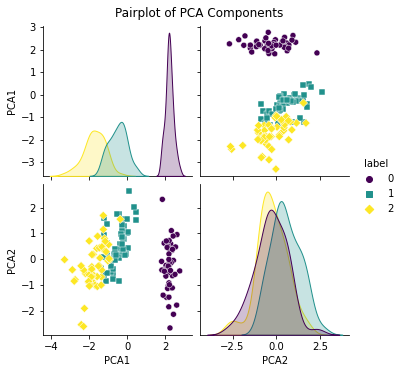

In [0]:
from mpl_toolkits.mplot3d import Axes3D  # For 3D scatter plots

# Pairplot for PCA components
sns.pairplot(
    data=pca_pd,
    vars=["PCA1", "PCA2"],
    hue="label",
    palette="viridis",
    markers=["o", "s", "D"]
)
plt.suptitle("Pairplot of PCA Components", y=1.02)
plt.show()


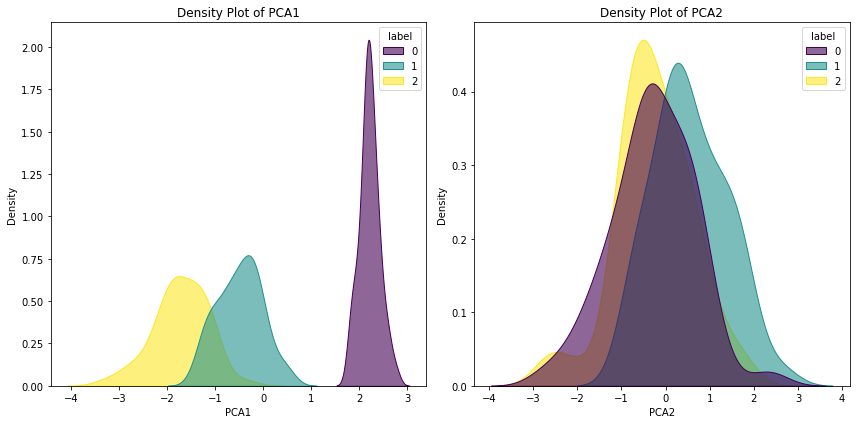

In [0]:
# Density plot for each PCA component
plt.figure(figsize=(12, 6))
for i, component in enumerate(["PCA1", "PCA2"], 1):
    plt.subplot(1, 2, i)
    sns.kdeplot(
        data=pca_pd,
        x=component,
        hue="label",
        fill=True,
        common_norm=False,
        palette="viridis",
        alpha=0.6
    )
    plt.title(f"Density Plot of {component}")
    plt.xlabel(component)
    plt.ylabel("Density")
plt.tight_layout()
plt.show()


/databricks/spark/python/pyspark/sql/pandas/conversion.py:122: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field pcaFeatures3. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


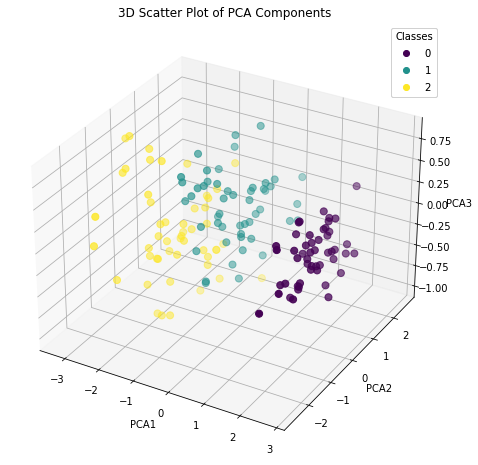

In [0]:
# 3D Scatter Plot (if you add a third PCA component)
pca3 = PCA(k=3, inputCol="scaledFeatures", outputCol="pcaFeatures3")
pca3_model = pca3.fit(scaled_df)
pca3_df = pca3_model.transform(scaled_df)
pca3_pd = pca3_df.select("pcaFeatures3", "label").toPandas()
pca3_pd[['PCA1', 'PCA2', 'PCA3']] = pd.DataFrame(pca3_pd['pcaFeatures3'].tolist(), index=pca3_pd.index)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca3_pd['PCA1'],
    pca3_pd['PCA2'],
    pca3_pd['PCA3'],
    c=pca3_pd['label'],
    cmap="viridis",
    s=50
)
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)
ax.set_title("3D Scatter Plot of PCA Components")
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
plt.show()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:122: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field pcaFeatures. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


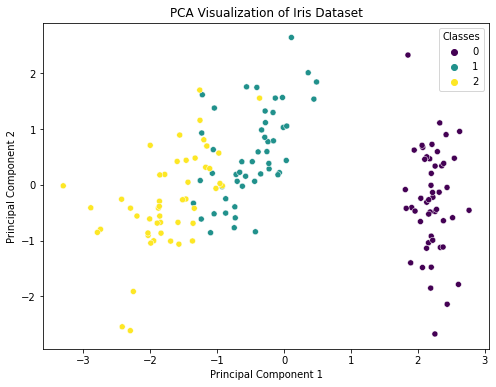

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Spark DataFrame to Pandas DataFrame
pca_pd = pca_df.select("pcaFeatures", "label").toPandas()

# Split PCA features into separate columns
pca_pd[['PCA1', 'PCA2']] = pd.DataFrame(pca_pd['pcaFeatures'].tolist(), index=pca_pd.index)

# Plot PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue=pca_pd["label"],
    palette="viridis",
    data=pca_pd,
    legend="full"
)
plt.title("PCA Visualization of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Classes")
plt.show()
